In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("datos/dataset_animal.csv")

Aviso de antemano que este es mi segundo DF, el primero tuve problemas para abrirlo y estuve haciendo cosas en este mientras Ana me ayudaba abrirlo, y al final me dijo que usase este DF, lo que ocurre con este DF es que los datos seguramente no sean reales, es decir, es un DF creado por alguien, por lo que los datos son poco realistas o incluso bastante uniformes 😢😢🥀

# Análisis exploratorio

In [2]:
#Echamos un primer vistazo
df.head()

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date
0,China,Nuoxizhi,Male,Tongan,elephant,1733,9988566,0,19-01-16
1,China,Tanbuqiao,Female,White,dog,403,4367849,0,29-03-16
2,United States,El Paso,Male,Cuban,dog,6193,2939235,0,20-03-16
3,China,Zhongxin,Male,Spaniard,rabbit,9041,4852207,0,10-06-16
4,China,Bijia,Female,Colombian,cat,7505,6728496,0,17-01-16


In [3]:
#Miramos las columnas y filas que contiene
df.shape

(100000, 9)

In [4]:
#Los nombres de las columnas
df.columns

Index(['country', 'city', 'gender', 'ethnicity', 'animal_type', 'animals',
       'humans', 'is_required', 'last_updated_date'],
      dtype='object')

In [5]:
#Los Dtypes de cada columna
df.dtypes

country              object
city                 object
gender               object
ethnicity            object
animal_type          object
animals               int64
humans                int64
is_required           int64
last_updated_date    object
dtype: object

In [6]:
#info en general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   country            100000 non-null  object
 1   city               100000 non-null  object
 2   gender             100000 non-null  object
 3   ethnicity          100000 non-null  object
 4   animal_type        100000 non-null  object
 5   animals            100000 non-null  int64 
 6   humans             100000 non-null  int64 
 7   is_required        100000 non-null  int64 
 8   last_updated_date  100000 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.9+ MB


In [7]:
#info matemática de nuestras columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
animals,100000.0,4.987106e+03,2.889530e+03,0.0,2479.00,4986.0,7495.00,10000.0
humans,100000.0,5.009794e+06,2.880856e+06,10045.0,2514633.25,5025751.5,7496690.25,9999705.0
is_required,100000.0,5.010500e-01,5.000014e-01,0.0,0.00,1.0,1.00,1.0


In [8]:
##info matemática de nuestras columnas categóricas
df.describe(include = "object").T

,count,unique,top,freq
country,100000,5,China,71833
city,100000,8201,Washington,272
gender,100000,2,Male,50000
ethnicity,100000,93,Houma,1155
animal_type,100000,5,cat,20094
last_updated_date,100000,366,20-11-15,321


In [9]:
#Buscamos nan
df.isna().sum()

country              0
city                 0
gender               0
ethnicity            0
animal_type          0
animals              0
humans               0
is_required          0
last_updated_date    0
dtype: int64

In [10]:
# Y filas duplicadas?
df.duplicated().sum()

0

# Creamos un índice

In [11]:
df["id"] = range(df.shape[0])
df.head()

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date,id
0,China,Nuoxizhi,Male,Tongan,elephant,1733,9988566,0,19-01-16,0
1,China,Tanbuqiao,Female,White,dog,403,4367849,0,29-03-16,1
2,United States,El Paso,Male,Cuban,dog,6193,2939235,0,20-03-16,2
3,China,Zhongxin,Male,Spaniard,rabbit,9041,4852207,0,10-06-16,3
4,China,Bijia,Female,Colombian,cat,7505,6728496,0,17-01-16,4


# Creamos una nueva columna que dice si requieren de los humanos en vez del número necesario.

In [12]:
# Aplicamos un np where sobre una columna y creamos otra rellenando respecto si cumple nuestra condición
df["need_human"] = np.where(df["is_required"] > 0 , "Yes", "No")
df.head()

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date,id,need_human
0,China,Nuoxizhi,Male,Tongan,elephant,1733,9988566,0,19-01-16,0,No
1,China,Tanbuqiao,Female,White,dog,403,4367849,0,29-03-16,1,No
2,United States,El Paso,Male,Cuban,dog,6193,2939235,0,20-03-16,2,No
3,China,Zhongxin,Male,Spaniard,rabbit,9041,4852207,0,10-06-16,3,No
4,China,Bijia,Female,Colombian,cat,7505,6728496,0,17-01-16,4,No


In [13]:
#Checkeamos los resultados
df["need_human"].value_counts()

Yes    50105
No     49895
Name: need_human, dtype: int64

# Creamos tres columnas nuevas indicando los dias, meses y años de la última actualización de datos.

In [14]:
# Usando datetime
df["last_updated_date"] = pd.to_datetime(df["last_updated_date"])
df["year"] = df["last_updated_date"].dt.year
df["month"] = df["last_updated_date"].dt.month
df["day"] = df ["last_updated_date"].dt.day

In [15]:
# Haciéndolo con apply y funciones
"""
def separar_fecha(fecha):
    return fecha.split("-")[0], fecha.split("-")[1], fecha.split("-")[2]
df[["day", "month", "year"]] = df.apply(lambda f: separar_fecha(f["last_updated_date"]), axis = 1, result_type = "expand")
"""

'\ndef separar_fecha(fecha):\n    return fecha.split("-")[0], fecha.split("-")[1], fecha.split("-")[2]\ndf[["day", "month", "year"]] = df.apply(lambda f: separar_fecha(f["last_updated_date"]), axis = 1, result_type = "expand")\n'

In [16]:
df.head()

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date,id,need_human,year,month,day
0,China,Nuoxizhi,Male,Tongan,elephant,1733,9988566,0,2016-01-19,0,No,2016,1,19
1,China,Tanbuqiao,Female,White,dog,403,4367849,0,2016-03-29,1,No,2016,3,29
2,United States,El Paso,Male,Cuban,dog,6193,2939235,0,2016-03-20,2,No,2016,3,20
3,China,Zhongxin,Male,Spaniard,rabbit,9041,4852207,0,2016-10-06,3,No,2016,10,6
4,China,Bijia,Female,Colombian,cat,7505,6728496,0,2016-01-17,4,No,2016,1,17


# Vamos a poner los meses en formato escrito en vez de numérico

In [17]:
import calendar


In [18]:
#Creamos un diccionario con los valores únicos de month ordenados como key y un método de calendar para los nombres de los meses
dic_month = dict(zip(sorted(df["month"].unique()),list(calendar.month_name)[1:]))
dic_month

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [19]:
#creamos una función que aplique nuestro diccionario y luego le hacemos apply en la columna meses
def mes_nomb(mes):
    return dic_month[mes]
df["month"] = df["month"].apply(lambda x :mes_nomb(x))

df.head()

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date,id,need_human,year,month,day
0,China,Nuoxizhi,Male,Tongan,elephant,1733,9988566,0,2016-01-19,0,No,2016,January,19
1,China,Tanbuqiao,Female,White,dog,403,4367849,0,2016-03-29,1,No,2016,March,29
2,United States,El Paso,Male,Cuban,dog,6193,2939235,0,2016-03-20,2,No,2016,March,20
3,China,Zhongxin,Male,Spaniard,rabbit,9041,4852207,0,2016-10-06,3,No,2016,October,6
4,China,Bijia,Female,Colombian,cat,7505,6728496,0,2016-01-17,4,No,2016,January,17


# Para mejor visualización de los datos (por hacer algo) vamos a ordenar las filas por paises, por tipo de animales y por raza.

In [20]:
# Usamos el método sort_values para ordenar, ascending por defecto es True, pero es bueno visualizarlo
df.sort_values(by = ["country", "animal_type", "ethnicity"], ascending = [True, True, True], inplace = True)
df.head(5)

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date,id,need_human,year,month,day
1949,Brazil,Pentecoste,Female,Alaska Native,cat,6177,3406801,1,2016-05-15,1949,Yes,2016,May,15
9096,Brazil,Macaíba,Male,Alaska Native,cat,2588,1941696,1,2015-12-23,9096,Yes,2015,December,23
10067,Brazil,Capela,Female,Alaska Native,cat,7178,844094,1,2016-07-29,10067,Yes,2016,July,29
13562,Brazil,Bayeux,Male,Alaska Native,cat,2423,1687036,1,2016-08-06,13562,Yes,2016,August,6
24426,Brazil,Ribeirão Pires,Male,Alaska Native,cat,1970,8027260,1,2016-08-02,24426,Yes,2016,August,2


In [6]:
df[(df["animal_type"] == "cat") &( df["city"] == "Bijia")]

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date
4,China,Bijia,Female,Colombian,cat,7505,6728496,0,17-01-16
42014,China,Bijia,Female,Indonesian,cat,1693,4191634,1,12-07-16
50277,China,Bijia,Female,South American,cat,5959,5665208,0,17-12-15


# Queremos saber cuántos animales se han contado en cada país

In [21]:
# Usamos un groupby para sumar los animales de cada país
dfpais_animal = df.groupby(["country"])["animals"].sum().reset_index()
dfpais_animal

,country,animals
0,Brazil,74388992
1,Canada,22823660
2,China,357678243
3,India,128573
4,United States,43691169


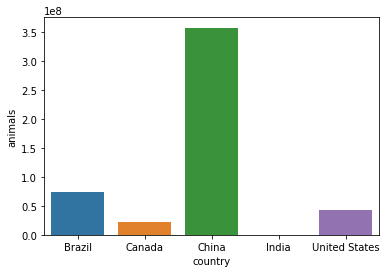

In [22]:
# Vamos a visualizar los resultados
sns.barplot(x = 'country', y = 'animals', data = dfpais_animal);

En esta gráfica vemos cuántos animales se han muestreado en cada país, y como podemos apreciar, la mayoría de nuestros datos vienen de China. Nos invaden los chinos! 😲😲

# Como podemos ver en el gráfico, los datos de la India no son relevantes en nuestro DF, por lo que vamos a eliminarlo

In [23]:
# Vamos a eliminar nuestros datos procedentes de la India
df2 = df[df["country"] != "India"]
df2["country"].value_counts()

China            71833
Brazil           14800
United States     8777
Canada            4567
Name: country, dtype: int64

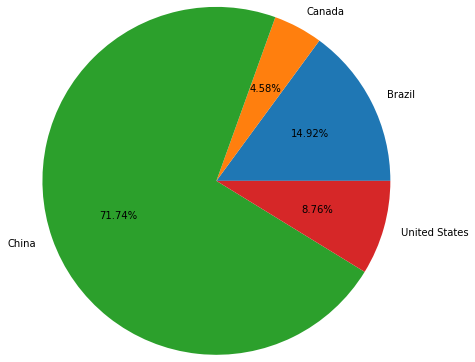

In [24]:
# Veamos de nuevo la gráfica anterior sin los datos de India
dfpais_animal2 = df2.groupby(["country"])["animals"].sum().reset_index()

plt.pie(dfpais_animal2["animals"],
        labels = dfpais_animal2["country"],
        autopct = "%1.2f%%",
        radius = 2);

# Para analizar si las poblaciones de animales son sanas, nos interesa saber el porcentaje de machos y hembras, si este porcentaje es cercano al 50% bien

In [25]:
#Primero vamos a sacar los machos y hembras de cada especie
dfani_sex = df.groupby(["animal_type","gender"])["animals"].sum()
dfani_tot = df.groupby("animal_type")["animals"].sum()
(dfani_sex/df.groupby("animal_type")["animals"].sum()) * 100

animal_type  gender
cat          Female    49.762600
             Male      50.237400
dog          Female    49.543322
             Male      50.456678
elephant     Female    49.788112
             Male      50.211888
horse        Female    50.566274
             Male      49.433726
rabbit       Female    49.615236
             Male      50.384764
Name: animals, dtype: float64

In [26]:
#las poblaciones más o menos están equilibradas, pero vamos a "VISUALIZARLO" mejor
#Agrupo por sexo y tipo de animal y sumo los animales (en el anterior lo hice percentil... no me vale)
dfani_sex = df.groupby(["gender","animal_type"])["animals"].sum()
dfani_sex

gender  animal_type
Female  cat            49778611
        dog            49363116
        elephant       49824777
        horse          50189083
        rabbit         49473578
Male    cat            50253564
        dog            50273150
        elephant       50248866
        horse          49064983
        rabbit         50240909
Name: animals, dtype: int64

In [27]:
#Creo un diccionario con los machos y hembras y les pongo sus respectivas keys
animal_dict = {"Female": list(dfani_sex.loc["Female"]), "Male": list(dfani_sex.loc["Male"])}
#Creo un DF de este dict
dfsex = pd.DataFrame(animal_dict)
dfsex

,Female,Male
0,49778611,50253564
1,49363116,50273150
2,49824777,50248866
3,50189083,49064983
4,49473578,50240909


In [28]:
#Creo una lista iterando por las lista de machos y hembras del total de ambos
totals = [a + b for a, b in zip(dfsex["Female"], dfsex["Male"])]
# Creo dos listas con los datos de los machos y hembras de cada especie en percentil
female_bars = [a / b * 100 for a, b in zip(dfsex["Female"], totals)]
male_bars = [a / b * 100 for a, b in zip(dfsex["Male"], totals)]

In [29]:
list(df["animal_type"].unique())

['cat', 'dog', 'elephant', 'horse', 'rabbit']

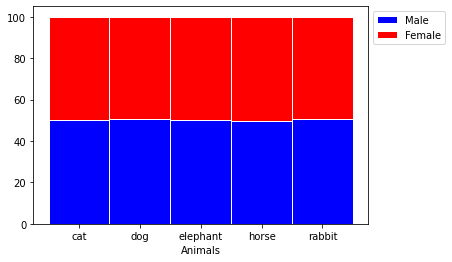

In [30]:
# Creamos un.... Percent stacked barplot para visualizar!
#Creo un rango de la misma longitud que mis datos
r = [i for i in range(len(dfani_sex.loc["Female"]))]
#Creo una lista con los nombres de los animales
col_name = list(df["animal_type"].unique())
#Creo las columnas Male
plt.bar(r, male_bars,
        color = "b",
        edgecolor = "white",
        width = 1,
        label = "Male")

#Creo las columnas Female
plt.bar(r, female_bars,
        bottom = male_bars,
        color = "r",
        edgecolor = "white",
        width = 1,
        label = "Female")

#Cambio los nombres de las columnas
plt.xticks(r, col_name)
#
plt.xlabel("Animals")
#Creo la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

Como podemos ver en la gráfica anterior, en todos nuestros animales el ratio de machos y hembras es muy cercano al 1, es decir, las poblaciones de machos son muy próximas a las de las hembras, por lo que tenemos una población balanceada! 👍👍

# Queremos ver gaticos!! 🐈🐈 digo... queremos ver cuántos gatos de distintas razas tenemos en Brasil

In [31]:
#Primero extraigo de mi DF los datos que me interesan, es decir solo los 😻 GATOS!!!😻 de Brazil
df_cat = df[(df["animal_type"] == "cat") & (df["country"] == "Brazil")]
df_cat.head(10)

,country,city,gender,ethnicity,animal_type,animals,humans,is_required,last_updated_date,id,need_human,year,month,day
1949,Brazil,Pentecoste,Female,Alaska Native,cat,6177,3406801,1,2016-05-15,1949,Yes,2016,May,15
9096,Brazil,Macaíba,Male,Alaska Native,cat,2588,1941696,1,2015-12-23,9096,Yes,2015,December,23
10067,Brazil,Capela,Female,Alaska Native,cat,7178,844094,1,2016-07-29,10067,Yes,2016,July,29
13562,Brazil,Bayeux,Male,Alaska Native,cat,2423,1687036,1,2016-08-06,13562,Yes,2016,August,6
24426,Brazil,Ribeirão Pires,Male,Alaska Native,cat,1970,8027260,1,2016-08-02,24426,Yes,2016,August,2
25461,Brazil,Várzea Paulista,Female,Alaska Native,cat,3611,8205139,1,2016-10-06,25461,Yes,2016,October,6
27113,Brazil,Ilhabela,Male,Alaska Native,cat,7221,2298932,1,2016-02-19,27113,Yes,2016,February,19
27198,Brazil,João Pessoa,Female,Alaska Native,cat,1032,141433,1,2016-06-10,27198,Yes,2016,June,10
28791,Brazil,Cruzeiro do Oeste,Female,Alaska Native,cat,141,4000144,1,2015-04-12,28791,Yes,2015,April,12
29890,Brazil,Esplanada,Male,Alaska Native,cat,9454,7385560,0,2016-01-23,29890,No,2016,January,23


In [32]:
#Sumo los gatos por especie (Hay como 60 razas más de gatos de los que me esperaba...😥😥)
df_cat_raz = (df_cat.groupby(["ethnicity"])["animals"].sum())
df_cat_raz

ethnicity
Alaska Native                               189634
Alaskan Athabascan                          177397
Aleut                                       172124
American Indian                             126935
American Indian and Alaska Native (AIAN)    157451
                                             ...  
Vietnamese                                  112166
White                                       166404
Yakama                                      144540
Yaqui                                       232244
Yuman                                       137519
Name: animals, Length: 93, dtype: int64

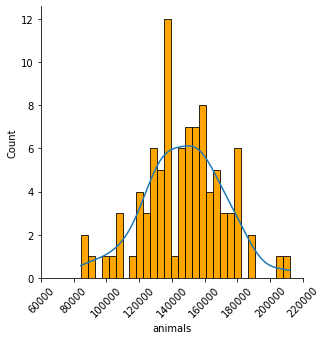

In [33]:
# Replanteamos el análisis, con los datos anteriores queremos ver la distribución de la población de las especies
fig_cat = sns.displot(x = df_cat_raz,
                      facecolor = "orange",
                      bins= 30,
                      kde = True,
                      height = 4.5)

fig_cat.set_xticklabels(rotation = 45)
plt.show();

# Ejercicio extra porque no tengo 5 visualizaciones!🤪🤪
# Queremos ver cuántos datos se han recogido en cada año y comparar por mes

In [34]:
#Checkeamos los años que tenemos
df["year"].unique()

array([2016, 2015], dtype=int64)

In [35]:
#Extraigo dos DF con los datos de cada año
df_2015, df_2016 = (df[df["year"] == 2015]), (df[df["year"] == 2016])

In [36]:
#Agrupamos los animales registrados por mes en 2015
df_reg2015 = (df_2015.groupby(df["last_updated_date"].dt.month)["animals"].sum()).reset_index()
df_reg2015

,last_updated_date,animals
0,1,1367556
1,2,2672614
2,3,2882102
3,4,2813451
4,5,2998230
5,6,2661908
6,7,2574115
7,8,2685910
8,9,2596723
9,10,2675887


In [37]:
#agrupamos los animales registrados por mes en 2016
df_reg2016 = (df_2016.groupby(df["last_updated_date"].dt.month)["animals"].sum()).reset_index()
df_reg2016

,last_updated_date,animals
0,1,41197277
1,2,36261763
2,3,39069507
3,4,37801921
4,5,39409250
5,6,38344905
6,7,39426520
7,8,39395075
8,9,38905000
9,10,39756113


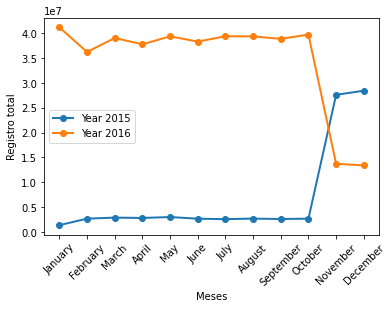

In [39]:
meses = list(calendar.month_name)[1:]
plt.plot(df_reg2015["last_updated_date"], df_reg2015["animals"],
         linewidth = 2,
         marker = "o",
         label = "Year 2015")

plt.plot(df_reg2016["last_updated_date"], df_reg2016["animals"], 
         linewidth = 2,
         marker = "o",
         label = "Year 2016")

plt.xlabel("Meses")
plt.ylabel("Registro total")
plt.xticks(df_reg2016["last_updated_date"],meses, rotation = 45)
plt.legend();

In [3]:
df["city"].value_counts()

Washington       272
Houston          176
New York City    155
Dallas           135
Hekou            123
                ... 
Hengjian           1
Oakville           1
Tanzhou            1
Hadapu Zhen        1
Liren              1
Name: city, Length: 8201, dtype: int64